# Cleaning and wrangling data
This chapter will be centered around tools for cleaning and wrangling data that move data from its raw format into a format that is suitable for data analysis. They 
will be presented in the context of a real world data science application, providing more practice working through a whole case study.

By the end of the chapter,

* define the term "tidy data"
* discuss the advantages and disadvantages from storing data in a tidy data format
* recall and use the following tidyverse functions and operators for their intended data wrangling tasks:
    - `select`
    - `filter`
    - `mutate`
    - `%>%`
    - `%in%`
    - `pivot_longer`
    - `pivot_wider`
    - `separate`
    - `summarize`
    - `group_by`
    - `map`
    
 ## Tidy Data

There are many ways a spreadsheet-like data set can be organized. This chapter will focus on the *tidy data* format of organization, and how to make your raw (and likely messy) data tidy. We want to tidy our data because a variety of tools we would like to use in R are designed to work most effectively (and efficiently) with tidy data. 

### What is tidy data?

Tidy data satisfy the following three criteria :

- each row is a single observation,
- each column is a single variable, and
- each value is a single cell (i.e., its row and column position in the data frame is not shared with another value)

### Why is tidy data important in R?

First, one of R's most popular plotting tool sets, the `ggplot2` package (which is one of the packages that the `tidyverse` package loads), expects the data to be in a tidy format. Second, most statistical analysis functions also expect data in a tidy format. Given that both of these tasks are central in almost all data analysis projects, it is well worth spending the time to get your data into a tidy format upfront. Luckily there are many well-designed `tidyverse` data cleaning/wrangling tools to help you easily tidy your data. Let's explore them now!

### Going from wide to long (or tidy!) using `pivot_longer`
One common thing that often has to be done to get data into a tidy format is to combine columns that are really part of the same variable but currently stored in separate columns. Data is often stored in a wider, not tidy, format because this format is often more intuitive for human readability and understanding, and humans create data sets. We can use the function `pivot_longer`, which combines columns, thus making the data frame longer and narrower. 

To learn how to use `pivot_longer`, we will work with a data set called [`region_lang`](https://ttimbers.github.io/canlang/), containing data retrieved from the 2016 Canadian census. For each census metropolitan area, this data set includes counts of how many Canadians cited each language as their mother tongue, the language spoken most often at home/work and which language they know. 

We will use `read_csv` to import a subset of the `region_lang` data called `region_lang_top5_cities_wide.csv`, which contains only the counts of how many Canadians cited each language as their mother tongue for five major Canadian cities (Toronto, Montreal, Vancouver, Calgary and Edmonton). Our data set is stored in an untidy format, as shown below:


In [1]:
library(tidyverse)
lang_wide <- read_csv("region_lang_top5_cities_wide.csv")
lang_wide

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::

category,language,Toronto,Montréal,Vancouver,Calgary,Edmonton
Aboriginal languages,"Aboriginal languages, n.o.s.",80,30,70,20,25
Non-Official & Non-Aboriginal languages,Afrikaans,985,90,1435,960,575
Non-Official & Non-Aboriginal languages,"Afro-Asiatic languages, n.i.e.",360,240,45,45,65
Non-Official & Non-Aboriginal languages,Akan (Twi),8485,1015,400,705,885
Non-Official & Non-Aboriginal languages,Albanian,13260,2450,1090,1365,770
Aboriginal languages,"Algonquian languages, n.i.e.",5,5,0,0,0
Aboriginal languages,Algonquin,5,30,5,5,0
Non-Official & Non-Aboriginal languages,American Sign Language,470,50,265,100,180
Non-Official & Non-Aboriginal languages,Amharic,7460,665,1140,4075,2515
Non-Official & Non-Aboriginal languages,Arabic,85175,151955,14320,18965,17525


What is wrong with our untidy format above? From a data analysis perspective, this format is not ideal because, in this format, the outcome of the variable *region* (Toronto, Montreal, Vancouver, Calgary and Edmonton) is stored as column names. Thus it is not easily accessible for the data analysis functions we will want to apply to our data set. Additionally, the values of the *mother tongue* variable are spread across multiple columns. This will prevent us from doing any desired visualization or statistical tasks until we somehow combine them into one column. For instance, suppose we want to know which languages had the highest number of Canadians reporting it as their mother tongue among all five regions? This question would be very difficult to answer with the data in its current format. It would be much easier to answer if we tidy our data first. 

To accomplish this data transformation, we will use the `tidyverse` function `pivot_longer`. To use `pivot_longer` we need to specify the:

1. `data`: the data set

2. `cols` : the names of the columns that we want to combine

3. `names_to`: the name of a new column that will be created, whose values will come from the *names of the columns* that we want to combine 

4. `values_to`: the name of a new column that will be created, whose values will come from the *values of the columns* we want to combine 

For the above example, we use `pivot_longer` to combine the Toronto, Montreal, Vancouver, Calgary and Edmonton columns into a single column called `region`, and create a column called `mother_tongue` that contains the count of how many Canadians report each language as their mother tongue for each metropolitan area. We use a colon `:` between Toronto and Edmonton tells R to select all the columns in between Toronto and Edmonton: 

In [2]:
lang_mother_tidy <- pivot_longer(lang_wide,
  cols = Toronto:Edmonton,
  names_to = "region",
  values_to = "mother_tongue"
)
lang_mother_tidy

category,language,region,mother_tongue
Aboriginal languages,"Aboriginal languages, n.o.s.",Toronto,80
Aboriginal languages,"Aboriginal languages, n.o.s.",Montréal,30
Aboriginal languages,"Aboriginal languages, n.o.s.",Vancouver,70
Aboriginal languages,"Aboriginal languages, n.o.s.",Calgary,20
Aboriginal languages,"Aboriginal languages, n.o.s.",Edmonton,25
Non-Official & Non-Aboriginal languages,Afrikaans,Toronto,985
Non-Official & Non-Aboriginal languages,Afrikaans,Montréal,90
Non-Official & Non-Aboriginal languages,Afrikaans,Vancouver,1435
Non-Official & Non-Aboriginal languages,Afrikaans,Calgary,960
Non-Official & Non-Aboriginal languages,Afrikaans,Edmonton,575


The data above is now tidy because all 3 criteria for tidy data have now been met:

1. All the variables (`category`, `language`, `region` and ``mother_tongue``) are now their own columns in the data frame. 
2. Each observation, i.e., each `category`, `language`, `region`, and count of Canadians where that language is the mother tongue, are in a single row.
3. Each value is a single cell, i.e., its row, column position in the data frame is not shared with another value.

### Going from long to wide using `pivot_wider`

Suppose we have observations spread across multiple rows rather than in a single row. To tidy this data, we can use the function `pivot_wider`, which generally increases the number of columns (widens) and decreases the number of rows in a data set.

The data set `region_lang_top5_cities_long.csv` contains the number of Canadians reporting the primary language at home and work for five major cities (Toronto, Montreal, Vancouver, Calgary and Edmonton). 

In [4]:
lang_long <- read_csv("region_lang_top5_cities_long.csv")
lang_long


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  region = col_character(),
  category = col_character(),
  language = col_character(),
  type = col_character(),
  count = col_double()
)



region,category,language,type,count
Montréal,Aboriginal languages,"Aboriginal languages, n.o.s.",most_at_home,15
Montréal,Aboriginal languages,"Aboriginal languages, n.o.s.",most_at_work,0
Toronto,Aboriginal languages,"Aboriginal languages, n.o.s.",most_at_home,50
Toronto,Aboriginal languages,"Aboriginal languages, n.o.s.",most_at_work,0
Calgary,Aboriginal languages,"Aboriginal languages, n.o.s.",most_at_home,5
Calgary,Aboriginal languages,"Aboriginal languages, n.o.s.",most_at_work,0
Edmonton,Aboriginal languages,"Aboriginal languages, n.o.s.",most_at_home,10
Edmonton,Aboriginal languages,"Aboriginal languages, n.o.s.",most_at_work,0
Vancouver,Aboriginal languages,"Aboriginal languages, n.o.s.",most_at_home,15
Vancouver,Aboriginal languages,"Aboriginal languages, n.o.s.",most_at_work,0


What is wrong with this format above? In this example, each observation should be a language in a region. However, in the messy data set above, each observation is split across multiple two rows - one where the count for `most_at_home` is recorded and one where the count for `most_at_work` is recorded. Suppose we wanted to visualize the relationship between the number of Canadians reporting their primary language at home and at work. It would be difficult to do that with the data in its current format. To fix this, we will use `pivot_wider`, and we need to specify the:
1. `data`: the data set

2. `names_from`: the name of a the column from which to take the variable names

3. `values_from`: the name of the column from which to take the values

In [5]:
lang_home_tidy <- pivot_wider(lang_long,
  names_from = type,
  values_from = count
)
lang_home_tidy

region,category,language,most_at_home,most_at_work
Montréal,Aboriginal languages,"Aboriginal languages, n.o.s.",15,0
Toronto,Aboriginal languages,"Aboriginal languages, n.o.s.",50,0
Calgary,Aboriginal languages,"Aboriginal languages, n.o.s.",5,0
Edmonton,Aboriginal languages,"Aboriginal languages, n.o.s.",10,0
Vancouver,Aboriginal languages,"Aboriginal languages, n.o.s.",15,0
Montréal,Non-Official & Non-Aboriginal languages,Afrikaans,10,0
Toronto,Non-Official & Non-Aboriginal languages,Afrikaans,265,0
Calgary,Non-Official & Non-Aboriginal languages,Afrikaans,505,15
Edmonton,Non-Official & Non-Aboriginal languages,Afrikaans,300,0
Vancouver,Non-Official & Non-Aboriginal languages,Afrikaans,520,10


he data above is now tidy! We can go through the three criteria again to check that this data is a tidy data set. 

1. All the variables are their own columns in the data frame, i.e., `most_at_home`, and `most_at_work` have been separated into their own columns in the data frame. 
2. Each observation, i.e., each `category`, `language`, `region`, `most_at_home` and `most_at_work`, are in a single row.
3. Each value is a single cell, i.e., its row, column position in the data frame is not shared with another value.

You might notice that we have the same number of columns in our tidy data set as we did in our messy one. Therefore `pivot_wider` didn't really "widen" our data as the name suggests. However, if we had more than two categories in the original `type` column, then we would see the data set "widen."  

### Using `separate` to deal with multiple delimiters
Data are also not considered tidy when multiple values are stored in the same cell, as discussed above. In addition to the previous untidiness we addressed in the earlier versions of this data set, the one we show below is even messier: 

the `Toronto`, `Montreal`, `Vancouver`, `Calgary` and `Edmonton` columns contain the number of Canadians reporting their primary language at home and work in one column separated by the delimiter "/". The column names are the values of a variable, AND each value does not have its own cell! To make this messy data tidy, we'll have to fix both of these issues.

In [6]:
lang_messy <- read_csv("region_lang_top5_cities_messy.csv")
lang_messy


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  category = col_character(),
  language = col_character(),
  Toronto = col_character(),
  Montréal = col_character(),
  Vancouver = col_character(),
  Calgary = col_character(),
  Edmonton = col_character()
)



category,language,Toronto,Montréal,Vancouver,Calgary,Edmonton
Aboriginal languages,"Aboriginal languages, n.o.s.",50/0,15/0,15/0,5/0,10/0
Non-Official & Non-Aboriginal languages,Afrikaans,265/0,10/0,520/10,505/15,300/0
Non-Official & Non-Aboriginal languages,"Afro-Asiatic languages, n.i.e.",185/10,65/0,10/0,15/0,20/0
Non-Official & Non-Aboriginal languages,Akan (Twi),4045/20,440/0,125/10,330/0,445/0
Non-Official & Non-Aboriginal languages,Albanian,6380/215,1445/20,530/10,620/25,370/10
Aboriginal languages,"Algonquian languages, n.i.e.",5/0,0/0,0/0,0/0,0/0
Aboriginal languages,Algonquin,0/0,10/0,0/0,0/0,0/0
Non-Official & Non-Aboriginal languages,American Sign Language,720/245,70/0,300/140,85/25,190/85
Non-Official & Non-Aboriginal languages,Amharic,3820/55,315/0,540/10,2730/50,1695/35
Non-Official & Non-Aboriginal languages,Arabic,45025/1165,72980/1590,8680/275,11010/240,10590/325


First we’ll use `pivot_longer` to create two columns, `region` and `value`, similar to what we did previously:

In [7]:
lang_messy_longer <- pivot_longer(lang_messy,
  cols = Toronto:Edmonton,
  names_to = "region",
  values_to = "value"
)
lang_messy_longer

category,language,region,value
Aboriginal languages,"Aboriginal languages, n.o.s.",Toronto,50/0
Aboriginal languages,"Aboriginal languages, n.o.s.",Montréal,15/0
Aboriginal languages,"Aboriginal languages, n.o.s.",Vancouver,15/0
Aboriginal languages,"Aboriginal languages, n.o.s.",Calgary,5/0
Aboriginal languages,"Aboriginal languages, n.o.s.",Edmonton,10/0
Non-Official & Non-Aboriginal languages,Afrikaans,Toronto,265/0
Non-Official & Non-Aboriginal languages,Afrikaans,Montréal,10/0
Non-Official & Non-Aboriginal languages,Afrikaans,Vancouver,520/10
Non-Official & Non-Aboriginal languages,Afrikaans,Calgary,505/15
Non-Official & Non-Aboriginal languages,Afrikaans,Edmonton,300/0


Then we'll use `separate` to split the `value` column into two columns, one that contains only the counts of Canadians that speak each language most at home, and one that contains the counts for most at work for each region. To use `separate` we need to specify the:
1. `data`: the data set

2. `col`: the name of a the column we need to split

3. `into`: a character vector of the new column names we would like to put the split data into

4. `sep`: the separator on which to split

In [8]:
lang_no_delimiter <- separate(lang_messy_longer,
  col = value,
  into = c("most_at_home", "most_at_work"),
  sep = "/"
)
lang_no_delimiter

category,language,region,most_at_home,most_at_work
Aboriginal languages,"Aboriginal languages, n.o.s.",Toronto,50,0
Aboriginal languages,"Aboriginal languages, n.o.s.",Montréal,15,0
Aboriginal languages,"Aboriginal languages, n.o.s.",Vancouver,15,0
Aboriginal languages,"Aboriginal languages, n.o.s.",Calgary,5,0
Aboriginal languages,"Aboriginal languages, n.o.s.",Edmonton,10,0
Non-Official & Non-Aboriginal languages,Afrikaans,Toronto,265,0
Non-Official & Non-Aboriginal languages,Afrikaans,Montréal,10,0
Non-Official & Non-Aboriginal languages,Afrikaans,Vancouver,520,10
Non-Official & Non-Aboriginal languages,Afrikaans,Calgary,505,15
Non-Official & Non-Aboriginal languages,Afrikaans,Edmonton,300,0


You might notice in the table above the word `<chr>` appears beneath each of the column names. The word under the column name indicates the data type of each column. Here all of our variables are "character" data types. Recall, a character data type is a letter or a number. In the previous example, `most_at_home` and `most_at_work`  were `<dbl>` (double) (you can verify this by looking at the tables in the previous sections), which is a numeric data type. This change is due to the delimiter "/" when we read in this messy data set. R read the columns in as character types, and it stayed that way after we separated the columns. 

Here it makes sense for `region`, `category`, and `language` to be stored as a character type. However, if we want to apply any functions that treat the `most_at_home` and `most_at_work` columns as a number (e.g. finding the maximum of the column), it won't be possible to do if the variable is stored as a `character`. R has a variety of data types, but here we will use the function `mutate` to convert these two columns to an "numeric" data type. `mutate` is a function that will allow us to create a new variable in our data set. We specify the data set in the first argument, and in the proceeding arguments, we specify the function we want to apply (`as.numeric`) to which columns (`most_at_home`, `most_at_work`). Then we give the mutated variable a new name. Here we are naming the columns the same names ("most_at_home", "most_at_work"), but you can call these mutated variables anything you'd like

In [9]:
lang_no_delimiter <- mutate(lang_no_delimiter,
  most_at_home = as.numeric(most_at_home),
  most_at_work = as.numeric(most_at_work)
)
lang_no_delimiter

category,language,region,most_at_home,most_at_work
Aboriginal languages,"Aboriginal languages, n.o.s.",Toronto,50,0
Aboriginal languages,"Aboriginal languages, n.o.s.",Montréal,15,0
Aboriginal languages,"Aboriginal languages, n.o.s.",Vancouver,15,0
Aboriginal languages,"Aboriginal languages, n.o.s.",Calgary,5,0
Aboriginal languages,"Aboriginal languages, n.o.s.",Edmonton,10,0
Non-Official & Non-Aboriginal languages,Afrikaans,Toronto,265,0
Non-Official & Non-Aboriginal languages,Afrikaans,Montréal,10,0
Non-Official & Non-Aboriginal languages,Afrikaans,Vancouver,520,10
Non-Official & Non-Aboriginal languages,Afrikaans,Calgary,505,15
Non-Official & Non-Aboriginal languages,Afrikaans,Edmonton,300,0


Now we see `<dbl>` appears under our columns, `most_at_home` and `most_at_work`, indicating they are double data types (which is one of the sub-types of numeric)!

Is this data now tidy? Well, if we recall the three criteria for tidy data:

- each row is a single observation,
- each column is a single variable, and
- each value is a single cell.

We can see that this data now satisfies all three criteria, making it easier to analyze.
For example, we could visualize how many people speak each of Canada's two 
official languages (English and French) as their primary language at home in 
these 5 regions. To do this, we first need to filter the data set for the 
rows that list the category as "Official languages", and then we can again use
`ggplot` to create our data visualization. Here we create a bar chart to 
represent the counts for each region, and colour the counts by language. 

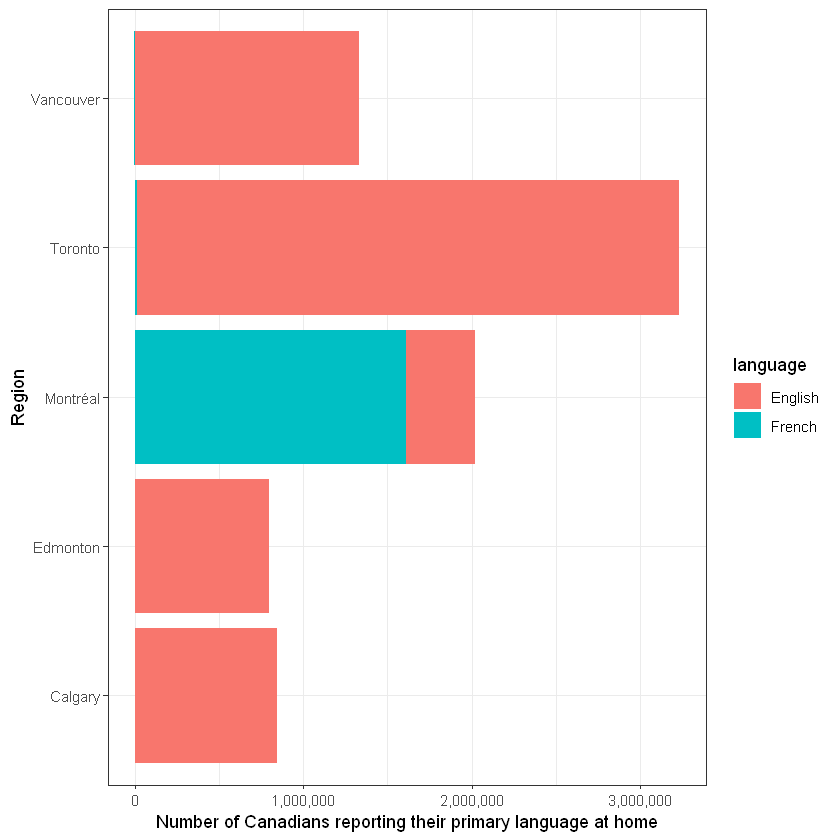

In [10]:
official_langs <- filter(lang_no_delimiter, category == "Official languages")
ggplot(official_langs, aes(x = region, y = most_at_work, fill = language)) +
  geom_bar(stat = "identity") +
  scale_color_manual(values = c("deepskyblue2", "firebrick1")) +
  xlab("Region") +
  scale_y_continuous(
    name = "Number of Canadians reporting their primary language at home",
    labels = scales::comma
  ) +
  coord_flip() + # making bars horizontal
  theme_bw()

## Combining functions using the pipe operator, `%>%`:

In R, we often have to call multiple functions in a sequence to process a data frame. The basic ways of doing this can become quickly unreadable if there are many steps. For example, suppose we need to perform three operations on
a data frame `data`:

1) add a new column `new_col` that is double another `old_col`
2) filter for rows where another column, `other_col`, is more than 5, and
3) select only the new column `new_col` for those rows.


One way of doing is to just write multiple lines of code, storing temporary objects as you go:

This is difficult to understand for multiple reasons. The reader may be tricked into thinking the named `output_1` and `output_2`
objects are important for some reason, while they are just temporary intermediate computations. Further, the reader has to look
through and find where `output_1` and `output_2` are used in each subsequent line.

Another option for doing this would be to *compose* the functions:

Code like this can also be difficult to understand. Functions compose (reading from left to right) in the *opposite order* in which
they are computed by R (above, `mutate` happens first, then `filter`, then `select`). It is also just a really long line of code
to read in one go. 

The *pipe operator* `%>%` solves this problem, resulting in cleaner and easier-to-follow code. The below accomplishes the same thing as the previous two code blocks:

You can think of the pipe as a physical pipe. It takes the output from the function on the left-hand side of the pipe, and
passes it as the first argument to the function on the right-hand side of the pipe. Note here that we have again split the 
code across multiple lines for readability; R is fine with this, since it knows that a line ending in a pipe `%>%` is continued
on the next line. Similarly, you see that after the first pipe, the remaining 
lines are indented until the end of the pipeline. This is not required for the 
R code to work, but again is used to aid in improving code readability.

Next, let's learn about the details of using the pipe, and look at some examples of how to use it in data analysis.
### Using `%>%` to combine `filter` and `select`

Let's work with our tidy `lang_home_tidy` data set from above, which contains the number of Canadians reporting their primary language at home and work for five major cities (Toronto, Montreal, Vancouver, Calgary and Edmonton):

In [12]:
lang_home_tidy

region,category,language,most_at_home,most_at_work
Montréal,Aboriginal languages,"Aboriginal languages, n.o.s.",15,0
Toronto,Aboriginal languages,"Aboriginal languages, n.o.s.",50,0
Calgary,Aboriginal languages,"Aboriginal languages, n.o.s.",5,0
Edmonton,Aboriginal languages,"Aboriginal languages, n.o.s.",10,0
Vancouver,Aboriginal languages,"Aboriginal languages, n.o.s.",15,0
Montréal,Non-Official & Non-Aboriginal languages,Afrikaans,10,0
Toronto,Non-Official & Non-Aboriginal languages,Afrikaans,265,0
Calgary,Non-Official & Non-Aboriginal languages,Afrikaans,505,15
Edmonton,Non-Official & Non-Aboriginal languages,Afrikaans,300,0
Vancouver,Non-Official & Non-Aboriginal languages,Afrikaans,520,10


Suppose we want to create a subset of the data with only the languages and counts of each language spoken most at home for the city of Vancouver. To do this, we can use the functions `filter` and `select`. First, we use `filter` to create a data frame called `van_data` that contains only values for Vancouver. We then use `select` on this data frame to keep only the variables we want:


In [13]:
van_data <- filter(lang_home_tidy, region == "Vancouver")
van_data

region,category,language,most_at_home,most_at_work
Vancouver,Aboriginal languages,"Aboriginal languages, n.o.s.",15,0
Vancouver,Non-Official & Non-Aboriginal languages,Afrikaans,520,10
Vancouver,Non-Official & Non-Aboriginal languages,"Afro-Asiatic languages, n.i.e.",10,0
Vancouver,Non-Official & Non-Aboriginal languages,Akan (Twi),125,10
Vancouver,Non-Official & Non-Aboriginal languages,Albanian,530,10
Vancouver,Aboriginal languages,"Algonquian languages, n.i.e.",0,0
Vancouver,Aboriginal languages,Algonquin,0,0
Vancouver,Non-Official & Non-Aboriginal languages,American Sign Language,300,140
Vancouver,Non-Official & Non-Aboriginal languages,Amharic,540,10
Vancouver,Non-Official & Non-Aboriginal languages,Arabic,8680,275


In [14]:
van_data_selected <- select(van_data, language, most_at_home)
van_data_selected

language,most_at_home
"Aboriginal languages, n.o.s.",15
Afrikaans,520
"Afro-Asiatic languages, n.i.e.",10
Akan (Twi),125
Albanian,530
"Algonquian languages, n.i.e.",0
Algonquin,0
American Sign Language,300
Amharic,540
Arabic,8680


Although this is valid code, there is a more readable approach we could take by using the pipe, `%>%`. With the pipe, we do not need to create an intermediate object to store the output from `filter`. Instead we can directly send the output of `filter` to the input of `select`:

In [15]:
van_data_selected <- filter(lang_home_tidy, region == "Vancouver") %>%
  select(language, most_at_home)
van_data_selected

language,most_at_home
"Aboriginal languages, n.o.s.",15
Afrikaans,520
"Afro-Asiatic languages, n.i.e.",10
Akan (Twi),125
Albanian,530
"Algonquian languages, n.i.e.",0
Algonquin,0
American Sign Language,300
Amharic,540
Arabic,8680


But wait - why does our `select` function call look different in these two examples? When you use the pipe, the output of the function on the left is automatically provided as the first argument for the function on the right, and thus you do not specify that argument in that function call. In the code above, the first argument of `select` is the data frame we are `select`-ing from, which is provided by the output of `filter`. 

As you can see, both of these approaches give us the same output, but the second approach is more clear and readable.

### Using `%>%` with more than two functions

The `%>%` can be used with any function in R. Additionally, we can pipe together more than two functions. For example, we can pipe together three functions to order the rows by counts of the language most spoken at home for only the counts that are more than 10,000 and only include the region, language and count of Canadians reporting their primary language at home in our table. 
To order the  by counts of the language most spoken at home we will use another 
`tidyverse` function, `arrange`. This function takes column names as input and 
orders the rows in the data frame in ascending order based on the values in the 
columns. Here we use only one column for sorting (`most_at_home`), but more than 
one can also be used. To do this, list additional columns separated by commas. 
The order they are listed in indicates the order in which they will be used for 
sorting. This is much like how an English dictionary sorts words: first by the 
first letter, then by the second letter, and so on. *Note: If you want to sort 
in reverse order, you can pair a function called `desc` with `arrange` (e.g., 
`arrange(desc(column_name))`).*

In [16]:
large_region_lang <- filter(lang_home_tidy, most_at_home > 10000) %>%
  select(region, language, most_at_home) %>%
  arrange(most_at_home)
large_region_lang

region,language,most_at_home
Edmonton,Arabic,10590
Montréal,Tamil,10670
Vancouver,Russian,10795
Edmonton,Spanish,10880
Edmonton,French,10950
Calgary,Arabic,11010
Calgary,Urdu,11060
Vancouver,Hindi,11235
Montréal,Armenian,11835
Toronto,Romanian,12200


## Iterating over data with `group_by` + `summarize`

### Calculating summary statistics:

As a part of many data analyses, we need to calculate a summary value for the data (a summary statistic). A useful `dplyr` function for doing this is 
`summarize`. Examples of summary statistics we might want to calculate are the number of observations, the average/mean value 
for a column, the minimum value for a column, etc. Below we show how to use the `summarize` function to calculate the minimum and maximum 
number of Canadians reporting a particular language as their primary language at home:

In [19]:
lang_summary <- summarize(lang_home_tidy,
  min_most_at_home = min(most_at_home),
  most_most_at_home = max(most_at_home)
)
lang_summary

min_most_at_home,most_most_at_home
0,3836770


### Calculating group summary statistics:
A common pairing with `summarize` is `group_by`. Pairing these functions together can let you summarize values for subgroups within a data set. For example, here, we can use `group_by` to group the regions and then calculate the minimum and maximum number of Canadians reporting the language as the primary language at home for each of the groups. The `group_by` function takes at least two arguments. The first is the data frame that will be grouped, and the second and onwards are columns to use in the grouping. Here we use only one column for grouping (`region`), but more than one can also be used. To do this, list additional columns separated by commas. 
    

In [20]:
lang_summary_by_region <- group_by(lang_home_tidy, region) %>%
  summarize(
    min_most_at_home = min(most_at_home),
    max_most_at_home = max(most_at_home)
  )
lang_summary_by_region

region,min_most_at_home,max_most_at_home
Calgary,0,1065070
Edmonton,0,1050410
Montréal,0,2669195
Toronto,0,3836770
Vancouver,0,1622735


### Additional reading on the `dplyr` functions


In [23]:
library(gapminder)

Warning message:
"package 'gapminder' was built under R version 3.6.3"

In [25]:
gapminder

country,continent,year,lifeExp,pop,gdpPercap
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134
Afghanistan,Asia,1982,39.854,12881816,978.0114
Afghanistan,Asia,1987,40.822,13867957,852.3959
Afghanistan,Asia,1992,41.674,16317921,649.3414
Afghanistan,Asia,1997,41.763,22227415,635.3414


In [26]:
class(gapminder)


[1] "tbl_df"     "tbl"        "data.frame"

In [27]:
class(iris)

[1] "data.frame"

In [29]:
as_tibble(iris) # to make tibble

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


In [30]:
my_gap <- gapminder

In [31]:
## let output print to screen, but do not store
my_gap %>% filter(country == "Canada")

country,continent,year,lifeExp,pop,gdpPercap
Canada,Americas,1952,68.750,14785584,11367.16
Canada,Americas,1957,69.960,17010154,12489.95
Canada,Americas,1962,71.300,18985849,13462.49
Canada,Americas,1967,72.130,20819767,16076.59
Canada,Americas,1972,72.880,22284500,18970.57
Canada,Americas,1977,74.210,23796400,22090.88
Canada,Americas,1982,75.760,25201900,22898.79
Canada,Americas,1987,76.860,26549700,26626.52
Canada,Americas,1992,77.950,28523502,26342.88
Canada,Americas,1997,78.610,30305843,28954.93


In [34]:
## store the output as an R object
my_precious <- my_gap %>% filter(country == "Canada")

In [35]:
## Use mutate() to add new variables
my_gap %>%
  mutate(gdp = pop * gdpPercap)

country,continent,year,lifeExp,pop,gdpPercap,gdp
Afghanistan,Asia,1952,28.801,8425333,779.4453,6567086330
Afghanistan,Asia,1957,30.332,9240934,820.8530,7585448670
Afghanistan,Asia,1962,31.997,10267083,853.1007,8758855797
Afghanistan,Asia,1967,34.020,11537966,836.1971,9648014150
Afghanistan,Asia,1972,36.088,13079460,739.9811,9678553274
Afghanistan,Asia,1977,38.438,14880372,786.1134,11697659231
Afghanistan,Asia,1982,39.854,12881816,978.0114,12598563401
Afghanistan,Asia,1987,40.822,13867957,852.3959,11820990309
Afghanistan,Asia,1992,41.674,16317921,649.3414,10595901589
Afghanistan,Asia,1997,41.763,22227415,635.3414,14121995875


In [36]:
ctib <- my_gap %>%
  filter(country == "Canada")
my_gap <- my_gap %>%
  mutate(tmp = rep(ctib$gdpPercap, nlevels(country)),
         gdpPercapRel = gdpPercap / tmp,
         tmp = NULL)

How could we sanity check that this worked? The Canadian values for gdpPercapRel better all be 1!

In [37]:
my_gap %>% 
  filter(country == "Canada") %>% 
  select(country, year, gdpPercapRel)

country,year,gdpPercapRel
Canada,1952,1
Canada,1957,1
Canada,1962,1
Canada,1967,1
Canada,1972,1
Canada,1977,1
Canada,1982,1
Canada,1987,1
Canada,1992,1
Canada,1997,1


In [38]:
summary(my_gap$gdpPercapRel)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.007236 0.061648 0.171521 0.326659 0.446564 9.534690 

In [39]:
# Use arrange() to row-order data in a principled way
my_gap %>%
  arrange(year, country)

country,continent,year,lifeExp,pop,gdpPercap,gdpPercapRel
Afghanistan,Asia,1952,28.801,8425333,779.4453,0.06856992
Albania,Europe,1952,55.230,1282697,1601.0561,0.14084925
Algeria,Africa,1952,43.077,9279525,2449.0082,0.21544589
Angola,Africa,1952,30.015,4232095,3520.6103,0.30971764
Argentina,Americas,1952,62.485,17876956,5911.3151,0.52003442
Australia,Oceania,1952,69.120,8691212,10039.5956,0.88321046
Austria,Europe,1952,66.800,6927772,6137.0765,0.53989527
Bahrain,Asia,1952,50.939,120447,9867.0848,0.86803421
Bangladesh,Asia,1952,37.484,46886859,684.2442,0.06019482
Belgium,Europe,1952,68.000,8730405,8343.1051,0.73396559


In [40]:
# Or maybe you want just the data from 2007, sorted on life expectancy?
my_gap %>%
  filter(year == 2007) %>%
  arrange(lifeExp)

country,continent,year,lifeExp,pop,gdpPercap,gdpPercapRel
Swaziland,Africa,2007,39.613,1133066,4513.4806,0.124272459
Mozambique,Africa,2007,42.082,19951656,823.6856,0.022679047
Zambia,Africa,2007,42.384,11746035,1271.2116,0.035001056
Sierra Leone,Africa,2007,42.568,6144562,862.5408,0.023748869
Lesotho,Africa,2007,42.592,2012649,1569.3314,0.043209375
Angola,Africa,2007,42.731,12420476,4797.2313,0.132085141
Zimbabwe,Africa,2007,43.487,12311143,469.7093,0.012932797
Afghanistan,Asia,2007,43.828,31889923,974.5803,0.026833724
Central African Republic,Africa,2007,44.741,4369038,706.0165,0.019439191
Liberia,Africa,2007,45.678,3193942,414.5073,0.011412887


In [41]:
# desecending
my_gap %>%
  filter(year == 2007) %>%
  arrange(desc(lifeExp))

country,continent,year,lifeExp,pop,gdpPercap,gdpPercapRel
Japan,Asia,2007,82.603,127467972,31656.068,0.8716061
"Hong Kong, China",Asia,2007,82.208,6980412,39724.979,1.0937725
Iceland,Europe,2007,81.757,301931,36180.789,0.9961881
Switzerland,Europe,2007,81.701,7554661,37506.419,1.0326875
Australia,Oceania,2007,81.235,20434176,34435.367,0.9481303
Spain,Europe,2007,80.941,40448191,28821.064,0.7935482
Sweden,Europe,2007,80.884,9031088,33859.748,0.9322814
Israel,Asia,2007,80.745,6426679,25523.277,0.7027482
France,Europe,2007,80.657,61083916,30470.017,0.8389498
Canada,Americas,2007,80.653,33390141,36319.235,1.0000000


In [42]:
# Use rename() to rename variables
my_gap %>%
  rename(life_exp = lifeExp,
         gdp_percap = gdpPercap,
         gdp_percap_rel = gdpPercapRel)

country,continent,year,life_exp,pop,gdp_percap,gdp_percap_rel
Afghanistan,Asia,1952,28.801,8425333,779.4453,0.06856992
Afghanistan,Asia,1957,30.332,9240934,820.8530,0.06572108
Afghanistan,Asia,1962,31.997,10267083,853.1007,0.06336874
Afghanistan,Asia,1967,34.020,11537966,836.1971,0.05201335
Afghanistan,Asia,1972,36.088,13079460,739.9811,0.03900679
Afghanistan,Asia,1977,38.438,14880372,786.1134,0.03558542
Afghanistan,Asia,1982,39.854,12881816,978.0114,0.04271018
Afghanistan,Asia,1987,40.822,13867957,852.3959,0.03201305
Afghanistan,Asia,1992,41.674,16317921,649.3414,0.02464959
Afghanistan,Asia,1997,41.763,22227415,635.3414,0.02194243


## Using `purrr`'s `map*` functions to iterate

Where should you turn when you discover the next step in your data wrangling/cleaning process requires you to apply a function to 
each column in a data frame? For example, if you wanted to know the maximum value of each column in a data frame? Well, you could use `summarize` 
as discussed above. However, this becomes inconvenient when you have many columns, as `summarize` requires you to type out a column name and a data 
transformation for each summary statistic you want to calculate.

In cases like this, where you want to apply the same data transformation to all columns, it is more efficient to use `purrr`'s `map` function to 
apply it to each column. For example, let's find the maximum value of each column of the complete `region_lang` data frame by using `map` with the `max` function. First, let’s peak at the data to familiarize ourselves with it:

In [43]:
region_lang <- read_csv("region_lang.csv")
region_lang


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  region = col_character(),
  category = col_character(),
  language = col_character(),
  mother_tongue = col_double(),
  most_at_home = col_double(),
  most_at_work = col_double(),
  lang_known = col_double()
)



region,category,language,mother_tongue,most_at_home,most_at_work,lang_known
St. John's,Aboriginal languages,"Aboriginal languages, n.o.s.",5,0,0,0
Halifax,Aboriginal languages,"Aboriginal languages, n.o.s.",5,0,0,0
Moncton,Aboriginal languages,"Aboriginal languages, n.o.s.",0,0,0,0
Saint John,Aboriginal languages,"Aboriginal languages, n.o.s.",0,0,0,0
Saguenay,Aboriginal languages,"Aboriginal languages, n.o.s.",5,5,0,0
Québec,Aboriginal languages,"Aboriginal languages, n.o.s.",0,5,0,20
Sherbrooke,Aboriginal languages,"Aboriginal languages, n.o.s.",0,0,0,0
Trois-Rivières,Aboriginal languages,"Aboriginal languages, n.o.s.",0,0,0,0
Montréal,Aboriginal languages,"Aboriginal languages, n.o.s.",30,15,0,10
Kingston,Aboriginal languages,"Aboriginal languages, n.o.s.",0,0,0,0


Next, we will select only the numeric columns of the data frame:


In [44]:
region_lang_numeric <- region_lang %>%
  select(mother_tongue:lang_known)
region_lang_numeric

mother_tongue,most_at_home,most_at_work,lang_known
5,0,0,0
5,0,0,0
0,0,0,0
0,0,0,0
5,5,0,0
0,5,0,20
0,0,0,0
0,0,0,0
30,15,0,10
0,0,0,0


Next, we use `map` to apply the `max` function to each column. `map` takes two arguments, an object (a vector, data frame or list) that you want 
to apply the function to, and the function that you would like to apply. Here our arguments will be `region_lang_numeric` and `max`:

In [45]:
max_of_columns <- map(region_lang_numeric, max)
max_of_columns

$mother_tongue
[1] 3061820

$most_at_home
[1] 3836770

$most_at_work
[1] 3218725

$lang_known
[1] 5600480

Our output looks a bit weird... we passed in a data frame, but our output doesn't look like a data frame. As it so happens, it is *not* a 
data frame, but rather a plain vanilla list:

In [46]:
typeof(max_of_columns)

[1] "list"

So what do we do? Should we convert this to a data frame? We could, but a simpler alternative is to just use a different `map_*` function from 
the `purrr` package. There are quite a few to choose from, they all work similarly, and their name reflects the type of output you want from 
the mapping operation:

| `map` function | Output |
|----------|--------|
| `map()` | list |
| `map_lgl()` | logical vector |
| `map_int()` | integer vector |
| `map_dbl()` | double vector |
| `map_chr()` | character vector |
| `map_df()` | data frame |

Let's get the columns' maximums again, but this time use the `map_df` function to return the output as a data frame:

In [48]:
max_of_columns <- map_df(region_lang_numeric, max)
max_of_columns

mother_tongue,most_at_home,most_at_work,lang_known
3061820,3836770,3218725,5600480


Which `map_*` function you choose depends on what you want to do with the output; you don't always have to pick `map_df`!

What if you need to add other arguments to the functions you want to map? For example, what if there were NA values in our columns that we wanted to know the maximum of? 

In [52]:
region_with_nas <- read_csv("region_lang_with_nas.csv")
region_with_nas


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  mother_tongue = col_double(),
  most_at_home = col_double(),
  most_at_work = col_double(),
  lang_known = col_double()
)



mother_tongue,most_at_home,most_at_work,lang_known
5,5,NA,NA
5,0,0,0
5,0,0,0
0,0,0,0
0,0,0,0
5,5,0,0
0,0,0,0
0,0,0,0
0,0,0,0
0,0,0,0


In [53]:
map_df(region_with_nas,max)

mother_tongue,most_at_home,most_at_work,lang_known
3061820,3836770,NA,NA


Notice `map_df()` returns `NA` for the `most_at_work` and `lang_known` variables since those columns contained NAs in the data frame. Thus, we also need to add the argument `na.rm  = TRUE` to the `max` function so that we get a more useful value than `NA` returned (remember that is what happens with many of the built-in R statistical functions when NA's are present...). What we need to do in that case is add these additional arguments to the end of our call to to `map` and they will be passed to the function that we are mapping. An example of this is shown below:

In [54]:
map_df(region_with_nas,max,na.rm = TRUE)

mother_tongue,most_at_home,most_at_work,lang_known
3061820,3836770,3218725,5600480


Now `map_df()` returns the maximum count for each column ignoring the NAs in the data set! 

The `map_*` functions are generally quite useful for solving problems involving iteration/repetition. Additionally, their use is not limited to columns 
of a data frame; `map_*` functions can be used to apply functions to elements of a vector or list, and even to lists of data frames, or nested data frames.

## Additional resources
Grolemund & Wickham's [R for Data Science](https://r4ds.had.co.nz/) has a number of useful sections that provide additional information:

- [Data transformation](https://r4ds.had.co.nz/transform.html)
- [Tidy data](https://r4ds.had.co.nz/tidy-data.html)
- [The `map_*` functions](https://r4ds.had.co.nz/iteration.html#the-map-functions)
-[STAT 545](https://stat545.com/index.html)